# Relate fluorescence responses to stimulation metadata stored in qcamraw associated .xsg files

## compile image data and pulse metadata

In [1]:
import lib.fileIngest as fileIngest
import joblib

xsgs = []
dPaths = ["/media/DATA/MAK/GRISZ_02/AA0001","/media/DATA/MAK/GRISZ_03/AA0001","/media/DATA/MAK/GRISZ_05/AA0001"]
# dPaths = ["/media/DATA/MAK/GRISZ_02/AA0001","/media/DATA/MAK/GRISZ_05/AA0001"]
# dPaths = ["/media/DATA/MAK/GRISZ_02/AA0001"]

# df = fileIngest.qcamPath2table(dPaths)
# cache GRISZ_02,3,5
# joblib.dump(df,'../data/cache/GRISZ_2-3-5_df_.joblib')
df = joblib.load('../data/cache/GRISZ_2-3-5_df_.joblib')
df


,qcam,dir,xsg,pulse,dB
1,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0017...,/media/DATA/MAK/GRISZ_02/AA0001,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0017...,6-64kHz_40dB_10000msTotal_Fs250kHz,40.0
2,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0032...,/media/DATA/MAK/GRISZ_02/AA0001,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0032...,6-64kHz_70dB_10000msTotal_Fs250kHz,70.0
3,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0033...,/media/DATA/MAK/GRISZ_02/AA0001,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0033...,6-64kHz_30dB_10000msTotal_Fs250kHz,30.0
4,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0034...,/media/DATA/MAK/GRISZ_02/AA0001,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0034...,6-64kHz_40dB_10000msTotal_Fs250kHz,40.0
5,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0035...,/media/DATA/MAK/GRISZ_02/AA0001,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0035...,6-64kHz_50dB_10000msTotal_Fs250kHz,50.0
...,...,...,...,...,...
290,/media/DATA/MAK/GRISZ_05/AA0001/AA0001AAAA0019...,/media/DATA/MAK/GRISZ_05/AA0001,/media/DATA/MAK/GRISZ_05/AA0001/AA0001AAAA0019...,6-64kHz_30dB_10000msTotal_Fs250kHz,30.0
291,/media/DATA/MAK/GRISZ_05/AA0001/AA0001AAAA0020...,/media/DATA/MAK/GRISZ_05/AA0001,/media/DATA/MAK/GRISZ_05/AA0001/AA0001AAAA0020...,6-64kHz_70dB_10000msTotal_Fs250kHz,70.0
292,/media/DATA/MAK/GRISZ_05/AA0001/AA0001AAAA0021...,/media/DATA/MAK/GRISZ_05/AA0001,/media/DATA/MAK/GRISZ_05/AA0001/AA0001AAAA0021...,6-64kHz_80dB_10000msTotal_Fs250kHz,80.0
293,/media/DATA/MAK/GRISZ_05/AA0001/AA0001AAAA0022...,/media/DATA/MAK/GRISZ_05/AA0001,/media/DATA/MAK/GRISZ_05/AA0001/AA0001AAAA0022...,6-64kHz_40dB_10000msTotal_Fs250kHz,40.0


In [2]:
# show files that will be excluded:
df[df['dB'].isna()]

,qcam,dir,xsg,pulse,dB
184,/media/DATA/MAK/GRISZ_03/AA0001/AA0001AAAA0100...,/media/DATA/MAK/GRISZ_03/AA0001,/media/DATA/MAK/GRISZ_03/AA0001/AA0001AAAA0100...,100ms_20-80BB_10dBStep_7secISI_42.7sec_long_Train,NaN
192,/media/DATA/MAK/GRISZ_05/AA0001/AA0001AAAA0002...,/media/DATA/MAK/GRISZ_05/AA0001,/media/DATA/MAK/GRISZ_05/AA0001/AA0001AAAA0002...,12p0kHzFreq_400msDur_3000msDel_10msRamp_3400ms...,NaN
196,/media/DATA/MAK/GRISZ_05/AA0001/AA0001AAAA0007...,/media/DATA/MAK/GRISZ_05/AA0001,/media/DATA/MAK/GRISZ_05/AA0001/AA0001AAAA0007...,12p0kHzFreq_400msDur_3000msDel_10msRamp_3400ms...,NaN
197,/media/DATA/MAK/GRISZ_05/AA0001/AA0001AAAA0008...,/media/DATA/MAK/GRISZ_05/AA0001,/media/DATA/MAK/GRISZ_05/AA0001/AA0001AAAA0008...,12p0kHzFreq_400msDur_3000msDel_10msRamp_3400ms...,NaN
198,/media/DATA/MAK/GRISZ_05/AA0001/AA0001AAAA0009...,/media/DATA/MAK/GRISZ_05/AA0001,/media/DATA/MAK/GRISZ_05/AA0001/AA0001AAAA0009...,12p0kHzFreq_400msDur_3000msDel_10msRamp_3400ms...,NaN
199,/media/DATA/MAK/GRISZ_05/AA0001/AA0001AAAA0010...,/media/DATA/MAK/GRISZ_05/AA0001,/media/DATA/MAK/GRISZ_05/AA0001/AA0001AAAA0010...,12p0kHzFreq_400msDur_3000msDel_10msRamp_3400ms...,NaN
286,/media/DATA/MAK/GRISZ_05/AA0001/AA0001AAAA0109...,/media/DATA/MAK/GRISZ_05/AA0001,/media/DATA/MAK/GRISZ_05/AA0001/AA0001AAAA0109...,100ms_20-80BB_10dBStep_7secISI_42.7sec_long_Train,NaN


In [3]:
# exclude unmatched stim data
df = df.dropna()

In [4]:
# get image data
df,qcam2img,qcam2header = fileIngest.loadQCamTable(df)
df

,qcam,dir,xsg,pulse,dB,nFrames,timestamp_init,dim_YX
0,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0017...,/media/DATA/MAK/GRISZ_02/AA0001,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0017...,6-64kHz_40dB_10000msTotal_Fs250kHz,40.0,200,2024-11-18 14:28:55,"(130, 174)"
1,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0032...,/media/DATA/MAK/GRISZ_02/AA0001,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0032...,6-64kHz_70dB_10000msTotal_Fs250kHz,70.0,200,2024-11-18 14:33:56,"(130, 174)"
2,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0033...,/media/DATA/MAK/GRISZ_02/AA0001,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0033...,6-64kHz_30dB_10000msTotal_Fs250kHz,30.0,200,2024-11-18 14:34:16,"(130, 174)"
3,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0034...,/media/DATA/MAK/GRISZ_02/AA0001,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0034...,6-64kHz_40dB_10000msTotal_Fs250kHz,40.0,200,2024-11-18 14:34:36,"(130, 174)"
4,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0035...,/media/DATA/MAK/GRISZ_02/AA0001,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0035...,6-64kHz_50dB_10000msTotal_Fs250kHz,50.0,200,2024-11-18 14:34:56,"(130, 174)"
...,...,...,...,...,...,...,...,...
276,/media/DATA/MAK/GRISZ_05/AA0001/AA0001AAAA0019...,/media/DATA/MAK/GRISZ_05/AA0001,/media/DATA/MAK/GRISZ_05/AA0001/AA0001AAAA0019...,6-64kHz_30dB_10000msTotal_Fs250kHz,30.0,200,2024-12-11 16:15:03,"(130, 174)"
277,/media/DATA/MAK/GRISZ_05/AA0001/AA0001AAAA0020...,/media/DATA/MAK/GRISZ_05/AA0001,/media/DATA/MAK/GRISZ_05/AA0001/AA0001AAAA0020...,6-64kHz_70dB_10000msTotal_Fs250kHz,70.0,200,2024-12-11 16:15:36,"(130, 174)"
278,/media/DATA/MAK/GRISZ_05/AA0001/AA0001AAAA0021...,/media/DATA/MAK/GRISZ_05/AA0001,/media/DATA/MAK/GRISZ_05/AA0001/AA0001AAAA0021...,6-64kHz_80dB_10000msTotal_Fs250kHz,80.0,200,2024-12-11 16:15:56,"(130, 174)"
279,/media/DATA/MAK/GRISZ_05/AA0001/AA0001AAAA0022...,/media/DATA/MAK/GRISZ_05/AA0001,/media/DATA/MAK/GRISZ_05/AA0001/AA0001AAAA0022...,6-64kHz_40dB_10000msTotal_Fs250kHz,40.0,200,2024-12-11 16:16:16,"(130, 174)"


In [5]:
df['t'] = df.apply(lambda x: fileIngest.getTimeVec(x['nFrames'], frameRate=20, zeroStart=True),axis=1)
# assume number of frames and dims are consistent
t = df['t'].iloc[0]
t

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05,
       1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 ,
       1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  , 2.05, 2.1 , 2.15,
       2.2 , 2.25, 2.3 , 2.35, 2.4 , 2.45, 2.5 , 2.55, 2.6 , 2.65, 2.7 ,
       2.75, 2.8 , 2.85, 2.9 , 2.95, 3.  , 3.05, 3.1 , 3.15, 3.2 , 3.25,
       3.3 , 3.35, 3.4 , 3.45, 3.5 , 3.55, 3.6 , 3.65, 3.7 , 3.75, 3.8 ,
       3.85, 3.9 , 3.95, 4.  , 4.05, 4.1 , 4.15, 4.2 , 4.25, 4.3 , 4.35,
       4.4 , 4.45, 4.5 , 4.55, 4.6 , 4.65, 4.7 , 4.75, 4.8 , 4.85, 4.9 ,
       4.95, 5.  , 5.05, 5.1 , 5.15, 5.2 , 5.25, 5.3 , 5.35, 5.4 , 5.45,
       5.5 , 5.55, 5.6 , 5.65, 5.7 , 5.75, 5.8 , 5.85, 5.9 , 5.95, 6.  ,
       6.05, 6.1 , 6.15, 6.2 , 6.25, 6.3 , 6.35, 6.4 , 6.45, 6.5 , 6.55,
       6.6 , 6.65, 6.7 , 6.75, 6.8 , 6.85, 6.9 , 6.95, 7.  , 7.05, 7.1 ,
       7.15, 7.2 , 7.25, 7.3 , 7.35, 7.4 , 7.45, 7.

## visualize data re sound stimulation

In [6]:
df['dir'].iloc[0]

'/media/DATA/MAK/GRISZ_02/AA0001'

In [7]:
# dfXSG.groupby(['dB','dir'])
df[(df['dB']==80) & (df['dir']==df['dir'].iloc[0])]

,qcam,dir,xsg,pulse,dB,nFrames,timestamp_init,dim_YX,t
6,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0037...,/media/DATA/MAK/GRISZ_02/AA0001,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0037...,6-64kHz_80dB_10000msTotal_Fs250kHz,80.0,200,2024-11-18 14:35:36,"(130, 174)","[0.0, 0.05, 0.10000000000000002, 0.15000000000..."
11,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0051...,/media/DATA/MAK/GRISZ_02/AA0001,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0051...,6-64kHz_80dB_10000msTotal_Fs250kHz,80.0,200,2024-11-18 14:40:16,"(130, 174)","[0.0, 0.05, 0.10000000000000002, 0.15000000000..."
15,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0064...,/media/DATA/MAK/GRISZ_02/AA0001,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0064...,6-64kHz_80dB_10000msTotal_Fs250kHz,80.0,200,2024-11-18 14:44:36,"(130, 174)","[0.0, 0.05, 0.10000000000000002, 0.15000000000..."
25,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0055...,/media/DATA/MAK/GRISZ_02/AA0001,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0055...,6-64kHz_80dB_10000msTotal_Fs250kHz,80.0,200,2024-11-18 14:41:36,"(130, 174)","[0.0, 0.05, 0.10000000000000002, 0.15000000000..."
27,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0071...,/media/DATA/MAK/GRISZ_02/AA0001,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0071...,6-64kHz_80dB_10000msTotal_Fs250kHz,80.0,200,2024-11-18 14:46:56,"(130, 174)","[0.0, 0.05, 0.10000000000000002, 0.15000000000..."
28,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0079...,/media/DATA/MAK/GRISZ_02/AA0001,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0079...,6-64kHz_80dB_10000msTotal_Fs250kHz,80.0,200,2024-11-18 14:49:36,"(130, 174)","[0.0, 0.05, 0.10000000000000002, 0.15000000000..."
30,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0095...,/media/DATA/MAK/GRISZ_02/AA0001,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0095...,6-64kHz_80dB_10000msTotal_Fs250kHz,80.0,200,2024-11-18 14:54:56,"(130, 174)","[0.0, 0.05, 0.10000000000000002, 0.15000000000..."
33,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0082...,/media/DATA/MAK/GRISZ_02/AA0001,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0082...,6-64kHz_80dB_10000msTotal_Fs250kHz,80.0,200,2024-11-18 14:50:36,"(130, 174)","[0.0, 0.05, 0.10000000000000002, 0.15000000000..."
48,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0025...,/media/DATA/MAK/GRISZ_02/AA0001,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0025...,6-64kHz_80dB_10000msTotal_Fs250kHz,80.0,200,2024-11-18 14:31:36,"(130, 174)","[0.0, 0.05, 0.10000000000000002, 0.15000000000..."
51,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0028...,/media/DATA/MAK/GRISZ_02/AA0001,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0028...,6-64kHz_80dB_10000msTotal_Fs250kHz,80.0,200,2024-11-18 14:32:36,"(130, 174)","[0.0, 0.05, 0.10000000000000002, 0.15000000000..."


(16, 130, 174, 200)


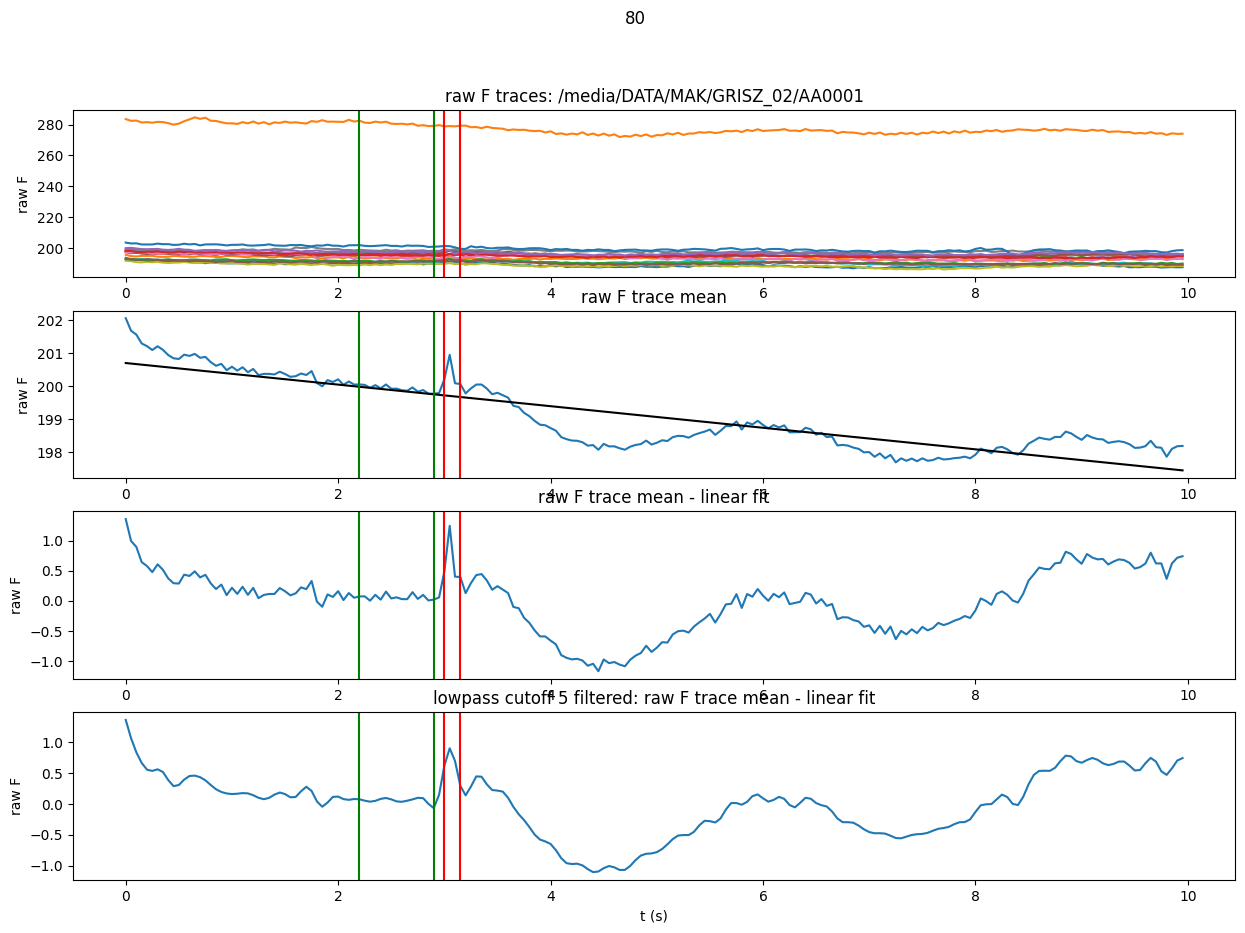

In [8]:
# will not make sense as different animals will have different fluo intensities
import matplotlib.pyplot as plt
from operator import itemgetter
import numpy as np
import lib.signalProcess as signalProcess

t_base = (2.2,2.9)
t_resp = (3.0,3.15)
cutoff_freq = 5

dB = 80
dir = df['dir'].iloc[0]
rawF = np.array(itemgetter(*df[(df['dB']==dB) & (df['dir']==dir)]['qcam'].tolist())(qcam2img))

print(rawF.shape)

F_linFilt,slope,intercept = signalProcess.subtractLinFit(t,rawF.mean(axis=(0,1,2)))

fig,ax = plt.subplots(4,1,figsize=(15,10))

ax[0].plot(t,rawF.mean(axis=(1,2)).T)
ax[0].set_title(f'raw F traces: {dir}')

ax[1].plot(t,rawF.mean(axis=(0,1,2)))
ax[1].plot(t,t*slope+intercept,'k-')
ax[1].set_title(f'raw F trace mean')

ax[2].plot(t,F_linFilt)
ax[2].set_title(f'raw F trace mean - linear fit')

ax[3].plot(t,signalProcess.butterFilter(F_linFilt,cutoff_freq=cutoff_freq))
ax[3].set_title(f'lowpass cutoff {cutoff_freq} filtered: raw F trace mean - linear fit')
ax[3].set_xlabel('t (s)')

for axn in ax:
    axn.axvline(x=t_base[0],color = 'g')
    axn.axvline(x=t_base[1],color = 'g')
    axn.axvline(x=t_resp[0],color = 'r')
    axn.axvline(x=t_resp[1],color = 'r')
    axn.set_ylabel('raw F')

fig.suptitle(dB)

fig.show()

In [10]:
# import plotly.express as px
# import pandas as pd

# dfF = pd.DataFrame(rawF.mean(axis=(1,2)).T)  # Transpose rawF to match shape (time, trace)
# dfF['time'] = t  # Add the time column to the DataFrame

# # Plot with plotly express
# fig = px.line(dfF, x='time', y=dfF.columns[:-1].tolist(), labels={'time': 'time (s)'})
# fig.show()

In [11]:
import lib.signalProcess as signalProcess

df['pkF_filt_linFilt'] = df.apply(lambda x: signalProcess.pkDFF(qcam2img[x['qcam']], x['t'],butterFilter=False),axis=1)
df['pkF_filt_linFilt_butterFilt'] = df.apply(lambda x: signalProcess.pkDFF(qcam2img[x['qcam']], x['t']),axis=1)
df['pkF_raw'] = df.apply(lambda x: signalProcess.pkDFF(qcam2img[x['qcam']], x['t'], subLinFit=False, butterFilter=False),axis=1)
df


,qcam,dir,xsg,pulse,dB,nFrames,timestamp_init,dim_YX,t,pkF_filt_linFilt,pkF_filt_linFilt_butterFilt,pkF_raw
0,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0017...,/media/DATA/MAK/GRISZ_02/AA0001,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0017...,6-64kHz_40dB_10000msTotal_Fs250kHz,40.0,200,2024-11-18 14:28:55,"(130, 174)","[0.0, 0.05, 0.10000000000000002, 0.15000000000...",0.332182,0.332182,0.003524
1,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0032...,/media/DATA/MAK/GRISZ_02/AA0001,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0032...,6-64kHz_70dB_10000msTotal_Fs250kHz,70.0,200,2024-11-18 14:33:56,"(130, 174)","[0.0, 0.05, 0.10000000000000002, 0.15000000000...",1.022283,1.022283,0.000928
2,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0033...,/media/DATA/MAK/GRISZ_02/AA0001,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0033...,6-64kHz_30dB_10000msTotal_Fs250kHz,30.0,200,2024-11-18 14:34:16,"(130, 174)","[0.0, 0.05, 0.10000000000000002, 0.15000000000...",1.293599,1.293599,0.001714
3,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0034...,/media/DATA/MAK/GRISZ_02/AA0001,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0034...,6-64kHz_40dB_10000msTotal_Fs250kHz,40.0,200,2024-11-18 14:34:36,"(130, 174)","[0.0, 0.05, 0.10000000000000002, 0.15000000000...",0.743932,0.743932,0.005508
4,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0035...,/media/DATA/MAK/GRISZ_02/AA0001,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0035...,6-64kHz_50dB_10000msTotal_Fs250kHz,50.0,200,2024-11-18 14:34:56,"(130, 174)","[0.0, 0.05, 0.10000000000000002, 0.15000000000...",6.040499,6.040499,0.003169
...,...,...,...,...,...,...,...,...,...,...,...,...
276,/media/DATA/MAK/GRISZ_05/AA0001/AA0001AAAA0019...,/media/DATA/MAK/GRISZ_05/AA0001,/media/DATA/MAK/GRISZ_05/AA0001/AA0001AAAA0019...,6-64kHz_30dB_10000msTotal_Fs250kHz,30.0,200,2024-12-11 16:15:03,"(130, 174)","[0.0, 0.05, 0.10000000000000002, 0.15000000000...",0.985810,0.985810,0.000039
277,/media/DATA/MAK/GRISZ_05/AA0001/AA0001AAAA0020...,/media/DATA/MAK/GRISZ_05/AA0001,/media/DATA/MAK/GRISZ_05/AA0001/AA0001AAAA0020...,6-64kHz_70dB_10000msTotal_Fs250kHz,70.0,200,2024-12-11 16:15:36,"(130, 174)","[0.0, 0.05, 0.10000000000000002, 0.15000000000...",1.382733,1.382733,0.000092
278,/media/DATA/MAK/GRISZ_05/AA0001/AA0001AAAA0021...,/media/DATA/MAK/GRISZ_05/AA0001,/media/DATA/MAK/GRISZ_05/AA0001/AA0001AAAA0021...,6-64kHz_80dB_10000msTotal_Fs250kHz,80.0,200,2024-12-11 16:15:56,"(130, 174)","[0.0, 0.05, 0.10000000000000002, 0.15000000000...",2.275794,2.275794,0.003355
279,/media/DATA/MAK/GRISZ_05/AA0001/AA0001AAAA0022...,/media/DATA/MAK/GRISZ_05/AA0001,/media/DATA/MAK/GRISZ_05/AA0001/AA0001AAAA0022...,6-64kHz_40dB_10000msTotal_Fs250kHz,40.0,200,2024-12-11 16:16:16,"(130, 174)","[0.0, 0.05, 0.10000000000000002, 0.15000000000...",0.178201,0.178201,0.000690


In [12]:
# # fig = px.bar(df, x="dB", y="pkF_filt_linFilt", color="dir", barmode='group')
# fig = px.histogram(df, x="dB", y="pkF_filt_linFilt",
#              color='dir', barmode='group',
#              histfunc='avg',
#              height=400)

# # fig = px.violin(df, y="pkF_filt_linFilt", x="dB", color="dir", box=False, points=False)
# fig.show()


In [13]:
# fig = px.violin(df, y="pkF_filt_linFilt", x="dB", color="dir", box=False, points=False)
# fig.show()

In [14]:
df.groupby(['dB','dir'])['pkF_filt_linFilt'].median()

dB    dir                            
30.0  /media/DATA/MAK/GRISZ_02/AA0001    1.272562
      /media/DATA/MAK/GRISZ_03/AA0001    1.250856
      /media/DATA/MAK/GRISZ_05/AA0001    0.647452
40.0  /media/DATA/MAK/GRISZ_02/AA0001    0.743932
      /media/DATA/MAK/GRISZ_03/AA0001    1.055527
      /media/DATA/MAK/GRISZ_05/AA0001    0.716915
50.0  /media/DATA/MAK/GRISZ_02/AA0001    1.077641
      /media/DATA/MAK/GRISZ_03/AA0001    0.568851
      /media/DATA/MAK/GRISZ_05/AA0001    1.230795
60.0  /media/DATA/MAK/GRISZ_02/AA0001    1.310752
      /media/DATA/MAK/GRISZ_03/AA0001    1.187429
      /media/DATA/MAK/GRISZ_05/AA0001    0.845121
70.0  /media/DATA/MAK/GRISZ_02/AA0001    2.172768
      /media/DATA/MAK/GRISZ_03/AA0001    1.570026
      /media/DATA/MAK/GRISZ_05/AA0001    1.382733
75.0  /media/DATA/MAK/GRISZ_03/AA0001    2.005393
80.0  /media/DATA/MAK/GRISZ_02/AA0001    3.536568
      /media/DATA/MAK/GRISZ_03/AA0001    1.027362
      /media/DATA/MAK/GRISZ_05/AA0001    0.865638
Name: pkF_fi

In [15]:
df.groupby(['dB','dir'])['pkF_filt_linFilt'].max()

dB    dir                            
30.0  /media/DATA/MAK/GRISZ_02/AA0001      6.908812
      /media/DATA/MAK/GRISZ_03/AA0001     11.567773
      /media/DATA/MAK/GRISZ_05/AA0001     11.613716
40.0  /media/DATA/MAK/GRISZ_02/AA0001     13.795620
      /media/DATA/MAK/GRISZ_03/AA0001      6.521467
      /media/DATA/MAK/GRISZ_05/AA0001      3.099698
50.0  /media/DATA/MAK/GRISZ_02/AA0001     38.239125
      /media/DATA/MAK/GRISZ_03/AA0001      2.266362
      /media/DATA/MAK/GRISZ_05/AA0001     49.301436
60.0  /media/DATA/MAK/GRISZ_02/AA0001      7.013481
      /media/DATA/MAK/GRISZ_03/AA0001     63.684942
      /media/DATA/MAK/GRISZ_05/AA0001      4.781158
70.0  /media/DATA/MAK/GRISZ_02/AA0001    128.126206
      /media/DATA/MAK/GRISZ_03/AA0001      8.221668
      /media/DATA/MAK/GRISZ_05/AA0001      6.928390
75.0  /media/DATA/MAK/GRISZ_03/AA0001      2.005393
80.0  /media/DATA/MAK/GRISZ_02/AA0001     49.559724
      /media/DATA/MAK/GRISZ_03/AA0001      6.389610
      /media/DATA/MAK/GRIS

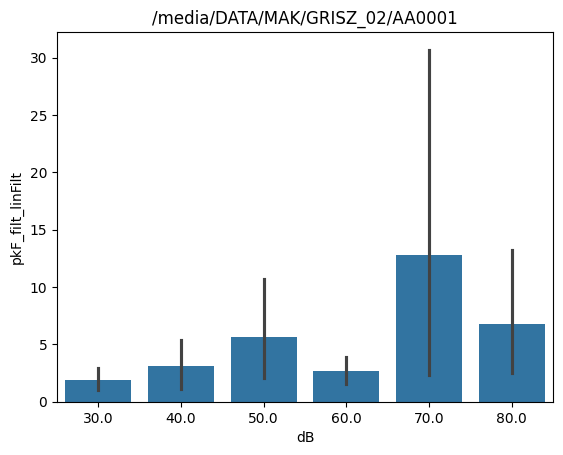

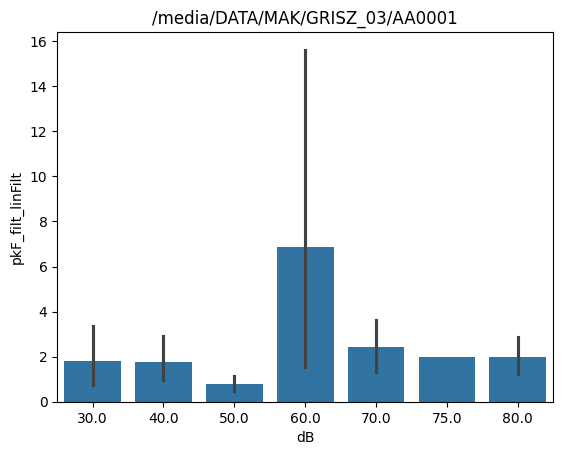

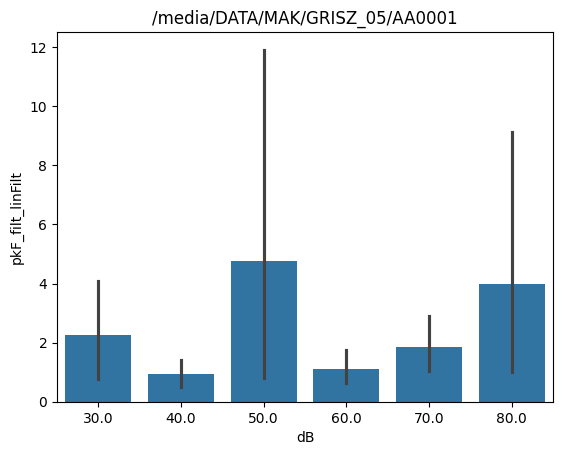

In [16]:
import seaborn as sns

for a,b in df.groupby('dir'):
    plt.figure()
    sns.barplot(b, x="dB", y="pkF_filt_linFilt")
    plt.title(a)

# analyze movement re stimulation using XY displacement of blood vessels via edge detection

In [17]:
df

,qcam,dir,xsg,pulse,dB,nFrames,timestamp_init,dim_YX,t,pkF_filt_linFilt,pkF_filt_linFilt_butterFilt,pkF_raw
0,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0017...,/media/DATA/MAK/GRISZ_02/AA0001,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0017...,6-64kHz_40dB_10000msTotal_Fs250kHz,40.0,200,2024-11-18 14:28:55,"(130, 174)","[0.0, 0.05, 0.10000000000000002, 0.15000000000...",0.332182,0.332182,0.003524
1,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0032...,/media/DATA/MAK/GRISZ_02/AA0001,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0032...,6-64kHz_70dB_10000msTotal_Fs250kHz,70.0,200,2024-11-18 14:33:56,"(130, 174)","[0.0, 0.05, 0.10000000000000002, 0.15000000000...",1.022283,1.022283,0.000928
2,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0033...,/media/DATA/MAK/GRISZ_02/AA0001,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0033...,6-64kHz_30dB_10000msTotal_Fs250kHz,30.0,200,2024-11-18 14:34:16,"(130, 174)","[0.0, 0.05, 0.10000000000000002, 0.15000000000...",1.293599,1.293599,0.001714
3,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0034...,/media/DATA/MAK/GRISZ_02/AA0001,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0034...,6-64kHz_40dB_10000msTotal_Fs250kHz,40.0,200,2024-11-18 14:34:36,"(130, 174)","[0.0, 0.05, 0.10000000000000002, 0.15000000000...",0.743932,0.743932,0.005508
4,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0035...,/media/DATA/MAK/GRISZ_02/AA0001,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0035...,6-64kHz_50dB_10000msTotal_Fs250kHz,50.0,200,2024-11-18 14:34:56,"(130, 174)","[0.0, 0.05, 0.10000000000000002, 0.15000000000...",6.040499,6.040499,0.003169
...,...,...,...,...,...,...,...,...,...,...,...,...
276,/media/DATA/MAK/GRISZ_05/AA0001/AA0001AAAA0019...,/media/DATA/MAK/GRISZ_05/AA0001,/media/DATA/MAK/GRISZ_05/AA0001/AA0001AAAA0019...,6-64kHz_30dB_10000msTotal_Fs250kHz,30.0,200,2024-12-11 16:15:03,"(130, 174)","[0.0, 0.05, 0.10000000000000002, 0.15000000000...",0.985810,0.985810,0.000039
277,/media/DATA/MAK/GRISZ_05/AA0001/AA0001AAAA0020...,/media/DATA/MAK/GRISZ_05/AA0001,/media/DATA/MAK/GRISZ_05/AA0001/AA0001AAAA0020...,6-64kHz_70dB_10000msTotal_Fs250kHz,70.0,200,2024-12-11 16:15:36,"(130, 174)","[0.0, 0.05, 0.10000000000000002, 0.15000000000...",1.382733,1.382733,0.000092
278,/media/DATA/MAK/GRISZ_05/AA0001/AA0001AAAA0021...,/media/DATA/MAK/GRISZ_05/AA0001,/media/DATA/MAK/GRISZ_05/AA0001/AA0001AAAA0021...,6-64kHz_80dB_10000msTotal_Fs250kHz,80.0,200,2024-12-11 16:15:56,"(130, 174)","[0.0, 0.05, 0.10000000000000002, 0.15000000000...",2.275794,2.275794,0.003355
279,/media/DATA/MAK/GRISZ_05/AA0001/AA0001AAAA0022...,/media/DATA/MAK/GRISZ_05/AA0001,/media/DATA/MAK/GRISZ_05/AA0001/AA0001AAAA0022...,6-64kHz_40dB_10000msTotal_Fs250kHz,40.0,200,2024-12-11 16:16:16,"(130, 174)","[0.0, 0.05, 0.10000000000000002, 0.15000000000...",0.178201,0.178201,0.000690


## get mask for each animal for tracking blood vessel movement

In [28]:
df.dir.unique()

array(['/media/DATA/MAK/GRISZ_02/AA0001',
       '/media/DATA/MAK/GRISZ_03/AA0001',
       '/media/DATA/MAK/GRISZ_05/AA0001'], dtype=object)

In [20]:
experimentDir = '/media/DATA/MAK/GRISZ_02/AA0001'

In [21]:
qcams = df[df['dir']==experimentDir]['qcam'].tolist()
qcams

['/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0017.qcamraw',
 '/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0032.qcamraw',
 '/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0033.qcamraw',
 '/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0034.qcamraw',
 '/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0035.qcamraw',
 '/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0036.qcamraw',
 '/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0037.qcamraw',
 '/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0038.qcamraw',
 '/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0048.qcamraw',
 '/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0049.qcamraw',
 '/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0050.qcamraw',
 '/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0051.qcamraw',
 '/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0052.qcamraw',
 '/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0053.qcamraw',
 '/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0054.qcamraw',
 '/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0064.qcamraw',
 '/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0065.qcamraw

In [22]:
from operator import itemgetter

imgs = itemgetter(*qcams)(qcam2img)
allImgSeries = np.array(imgs)
allImgSeries.shape

(92, 130, 174, 200)

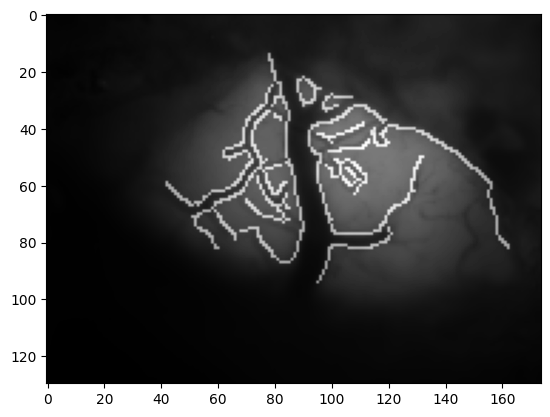

In [34]:
import lib.imgProcess as imgProcess

imgEdge = imgProcess.getImgEdges(allImgSeries.mean(axis=(0,3)))
plt.imshow(imgEdge+allImgSeries.mean(axis=(0,3))*0.3, cmap='gray')

In [40]:
ui, mask_output = imgProcess.getROImaskUI(imgEdge+allImgSeries.mean(axis=(0,3))*0.3)
ui

BokehModel(combine_events=True, render_bundle={'docs_json': {'43f70078-813a-4493-8637-f3e795a8e450': {'version…

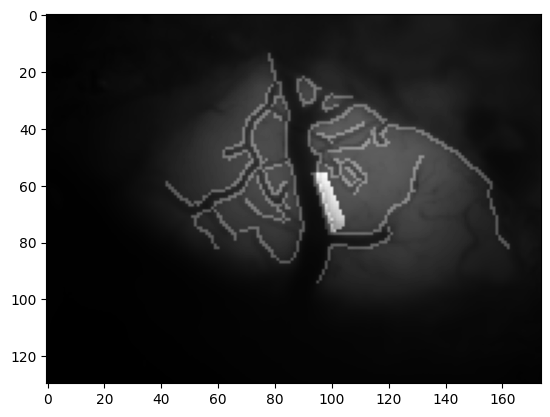

In [40]:
plt.imshow(allImgSeries.mean(axis=(0,3))*(mask_output['mask']+0.5)+imgEdge,cmap='gray')

In [45]:
import joblib
import os

joblib.dump(mask_output['mask'],os.path.join(experimentDir,'edgeROImask.joblib'))

['/media/DATA/MAK/GRISZ_02/AA0001/edgeROImask.joblib']

## analyze edge movement for each experiment within ROI

In [6]:
# map experiment directory to corresponding mask
# assume mask is lowest
import joblib
from glob import glob
import os

dir2mask = {dir:joblib.load(glob(os.path.join(dir,'edgeROImask.joblib'))[0])
            for dir in df.dir.unique()}

In [7]:
import lib.imgProcess as imgProcess

frameDiff = 2
df[['Xdisp','Ydisp', 'meanX', 'medianX', 'meanY', 'medianY']] = df.apply(lambda x: imgProcess.getEdgeXYdisp(qcam2img[x['qcam']],dir2mask[x['dir']],frameDiff = frameDiff), axis=1, result_type='expand')

In [8]:
df

,qcam,dir,xsg,pulse,dB,nFrames,timestamp_init,dim_YX,t,Xdisp,Ydisp,meanX,medianX,meanY,medianY
0,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0017...,/media/DATA/MAK/GRISZ_02/AA0001,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0017...,6-64kHz_40dB_10000msTotal_Fs250kHz,40.0,200,2024-11-18 14:28:55,"(130, 174)","[0.0, 0.05, 0.10000000000000002, 0.15000000000...","[0.045454545454545456, 0.0, -0.136363636363636...","[0.3333333333333333, -0.16666666666666666, 0.3...","[97.5, 97.4090909090909, 97.36363636363636, 97...","[97.5, 97.0, 97.0, 97.0, 97.0, 97.5, 97.0, 97....","[66.91666666666667, 66.5, 66.5, 66.65217391304...","[67.5, 66.5, 66.5, 67.0, 67.0, 67.5, 67.0, 67...."
1,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0032...,/media/DATA/MAK/GRISZ_02/AA0001,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0032...,6-64kHz_70dB_10000msTotal_Fs250kHz,70.0,200,2024-11-18 14:33:56,"(130, 174)","[0.0, 0.05, 0.10000000000000002, 0.15000000000...","[-0.047619047619047616, 0.047619047619047616, ...","[0.14285714285714285, -0.2857142857142857, -0....","[97.70833333333333, 97.625, 97.66666666666667,...","[98.0, 97.5, 98.0, 98.0, 98.0, 98.0, 97.0, 98....","[66.875, 66.875, 66.875, 67.08, 66.69565217391...","[67.5, 67.5, 67.5, 68.0, 67.0, 67.5, 67.0, 67...."
2,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0033...,/media/DATA/MAK/GRISZ_02/AA0001,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0033...,6-64kHz_30dB_10000msTotal_Fs250kHz,30.0,200,2024-11-18 14:34:16,"(130, 174)","[0.0, 0.05, 0.10000000000000002, 0.15000000000...","[-0.19047619047619047, -0.047619047619047616, ...","[0.5714285714285714, 0.2857142857142857, 0.0, ...","[97.70833333333333, 97.8, 97.625, 97.666666666...","[97.5, 98.0, 97.5, 98.0, 97.5, 98.0, 98.0, 98....","[66.5, 67.08, 66.875, 66.875, 66.875, 66.64, 6...","[66.5, 68.0, 67.5, 67.5, 67.5, 67.0, 67.0, 67...."
3,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0034...,/media/DATA/MAK/GRISZ_02/AA0001,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0034...,6-64kHz_40dB_10000msTotal_Fs250kHz,40.0,200,2024-11-18 14:34:36,"(130, 174)","[0.0, 0.05, 0.10000000000000002, 0.15000000000...","[-0.09523809523809523, -0.09523809523809523, 0...","[0.14285714285714285, 0.2857142857142857, 0.0,...","[97.65217391304348, 97.75, 97.66666666666667, ...","[98.0, 98.0, 98.0, 98.0, 98.0, 98.0, 98.0, 98....","[66.6086956521739, 66.83333333333333, 66.875, ...","[67.0, 67.5, 67.5, 67.5, 67.5, 67.0, 67.0, 68...."
4,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0035...,/media/DATA/MAK/GRISZ_02/AA0001,/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0035...,6-64kHz_50dB_10000msTotal_Fs250kHz,50.0,200,2024-11-18 14:34:56,"(130, 174)","[0.0, 0.05, 0.10000000000000002, 0.15000000000...","[0.0, -0.047619047619047616, -0.04761904761904...","[-0.14285714285714285, 0.2857142857142857, 0.2...","[97.6086956521739, 97.76, 97.66666666666667, 9...","[97.0, 98.0, 97.5, 97.5, 97.5, 97.5, 98.0, 98....","[66.69565217391305, 67.08, 66.83333333333333, ...","[67.0, 68.0, 67.5, 67.5, 67.5, 67.5, 67.0, 67...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,/media/DATA/MAK/GRISZ_05/AA0001/AA0001AAAA0019...,/media/DATA/MAK/GRISZ_05/AA0001,/media/DATA/MAK/GRISZ_05/AA0001/AA0001AAAA0019...,6-64kHz_30dB_10000msTotal_Fs250kHz,30.0,200,2024-12-11 16:15:03,"(130, 174)","[0.0, 0.05, 0.10000000000000002, 0.15000000000...","[0.08823529411764706, 0.0, 0.14705882352941177...","[0.05263157894736842, 0.0, 0.0, 0.0, -0.052631...","[114.14, 114.2127659574468, 114.08163265306122...","[115.0, 115.0, 115.0, 115.0, 115.0, 114.5, 115...","[67.08, 66.76595744680851, 66.81632653061224, ...","[65.5, 65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65...."
277,/media/DATA/MAK/GRISZ_05/AA0001/AA0001AAAA0020...,/media/DATA/MAK/GRISZ_05/AA0001,/media/DATA/MAK/GRISZ_05/AA0001/AA0001AAAA0020...,6-64kHz_70dB_10000msTotal_Fs250kHz,70.0,200,2024-12-11 16:15:36,"(130, 174)","[0.0, 0.05, 0.10000000000000002, 0.15000000000...","[0.11428571428571428, 0.02857142857142857, -0....","[0.0, -0.05263157894736842, -0.052631578947368...","[113.9795918367347,

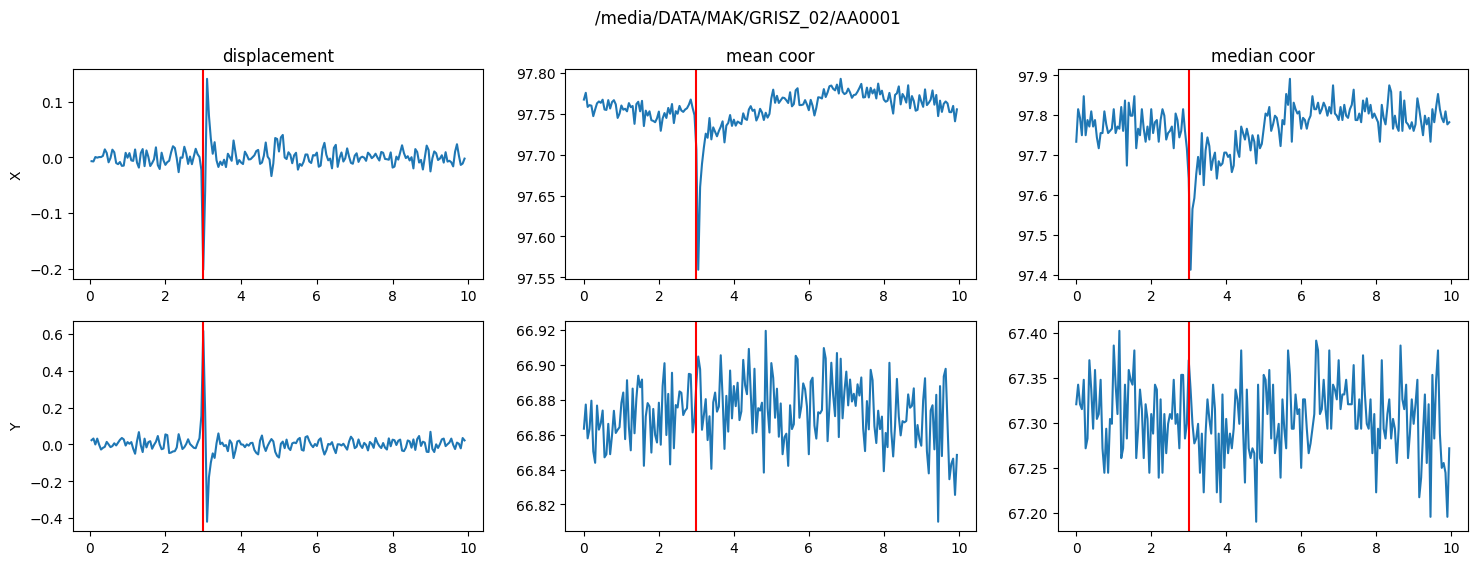

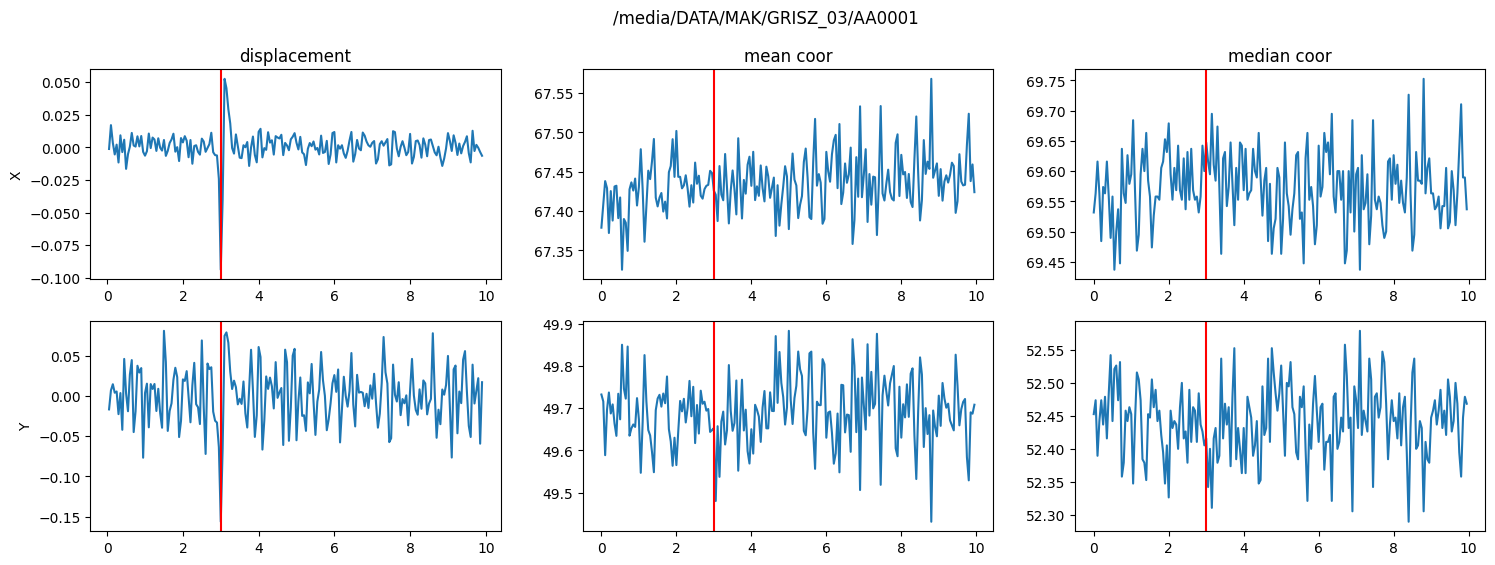

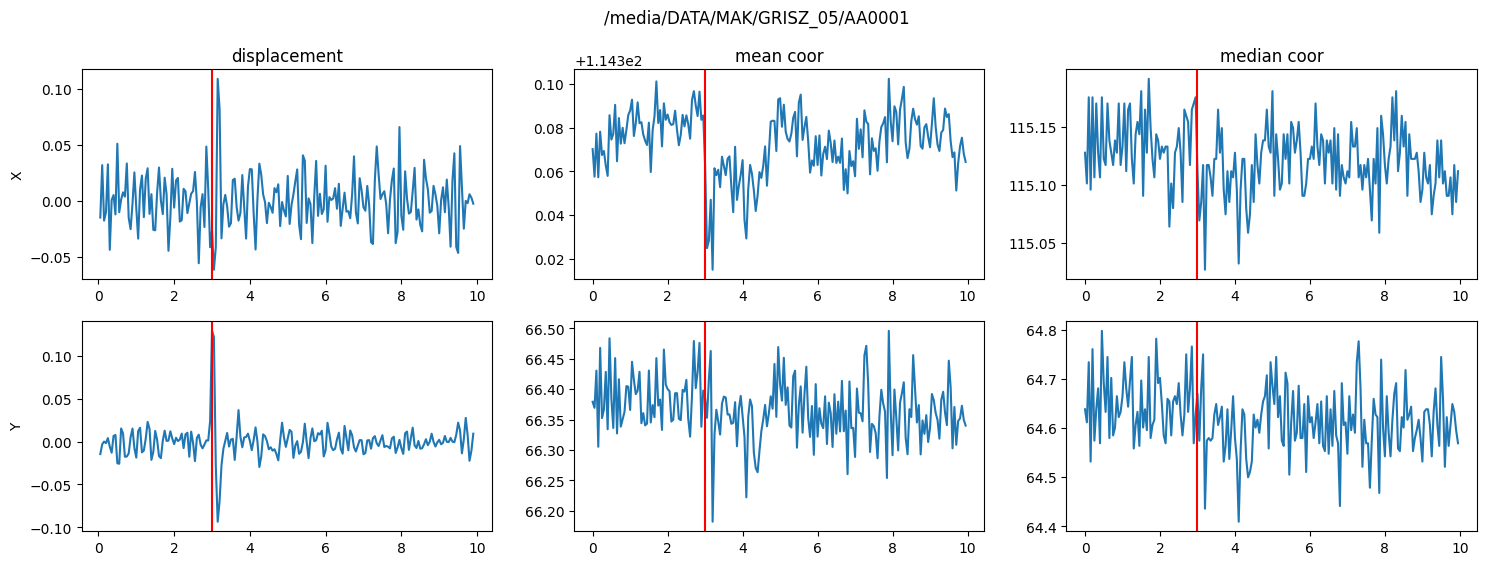

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from lib.signalProcess import butterFilter

# dir = '/media/DATA/MAK/GRISZ_02/AA0001'
# dir = '/media/DATA/MAK/GRISZ_05/AA0001'
# lowPassFilt = True
lowPassFilt = False

moveMeasures = ['Xdisp','Ydisp','meanX','meanY','medianX','medianY']

for a,b in df.groupby('dir'):
    fig,ax = plt.subplots(2,3,figsize=(18,6))
    t_disp = t[:-frameDiff]+0.05

    if lowPassFilt==False:
        dMove = {k:np.array(b[k].tolist()).mean(axis=0) for k in moveMeasures}
    else:
        dMove = {k:butterFilter(np.array(b[k].tolist()).mean(axis=0),cutoff_freq=3) for k in moveMeasures}

    ax[0,0].plot(t_disp,dMove['Xdisp'])
    ax[0,0].set_title('displacement')
    ax[0,0].set_ylabel('X')
    ax[1,0].set_ylabel('Y')

    ax[1,0].plot(t_disp,dMove['Ydisp'])
    ax[0,1].set_title('mean coor')

    ax[0,1].plot(t,dMove['meanX'])
    ax[1,1].plot(t,dMove['meanY'])

    ax[0,2].set_title('median coor')
    ax[0,2].plot(t,dMove['medianX'])
    ax[1,2].plot(t,dMove['medianY'])

    # Loop over rows and columns
    for i in range(2):
        for j in range(3):
            ax[i, j].axvline(x=3,color = 'r')

    fig.suptitle(a)



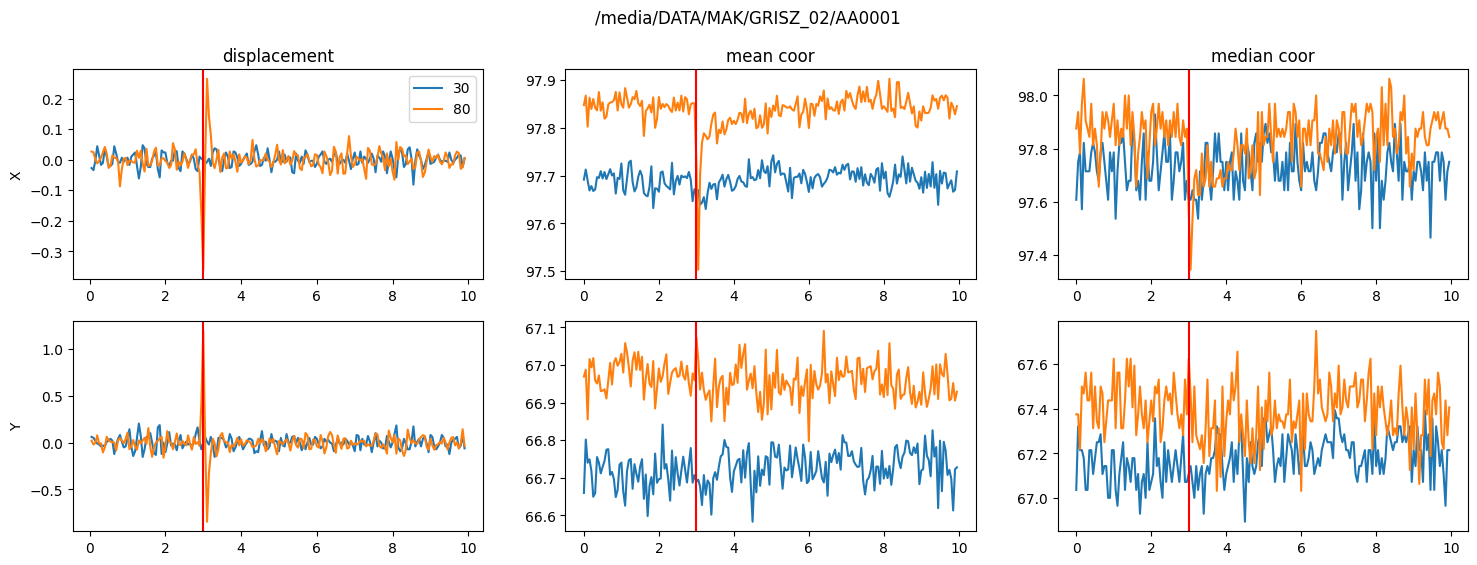

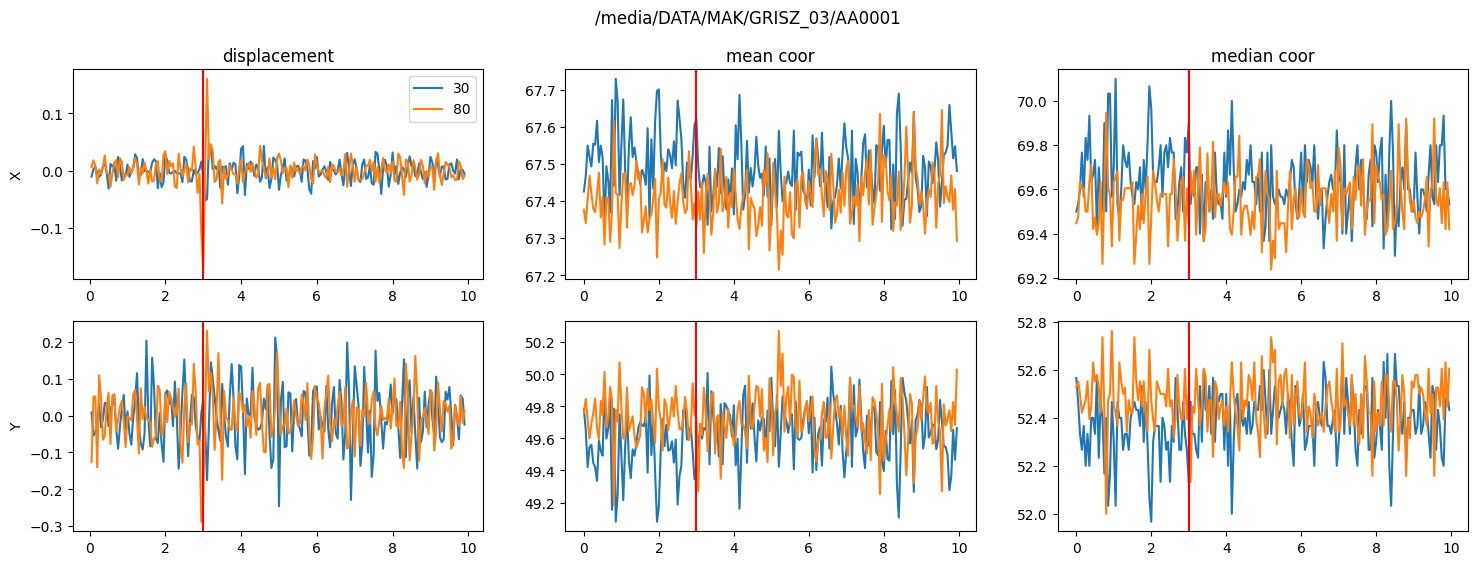

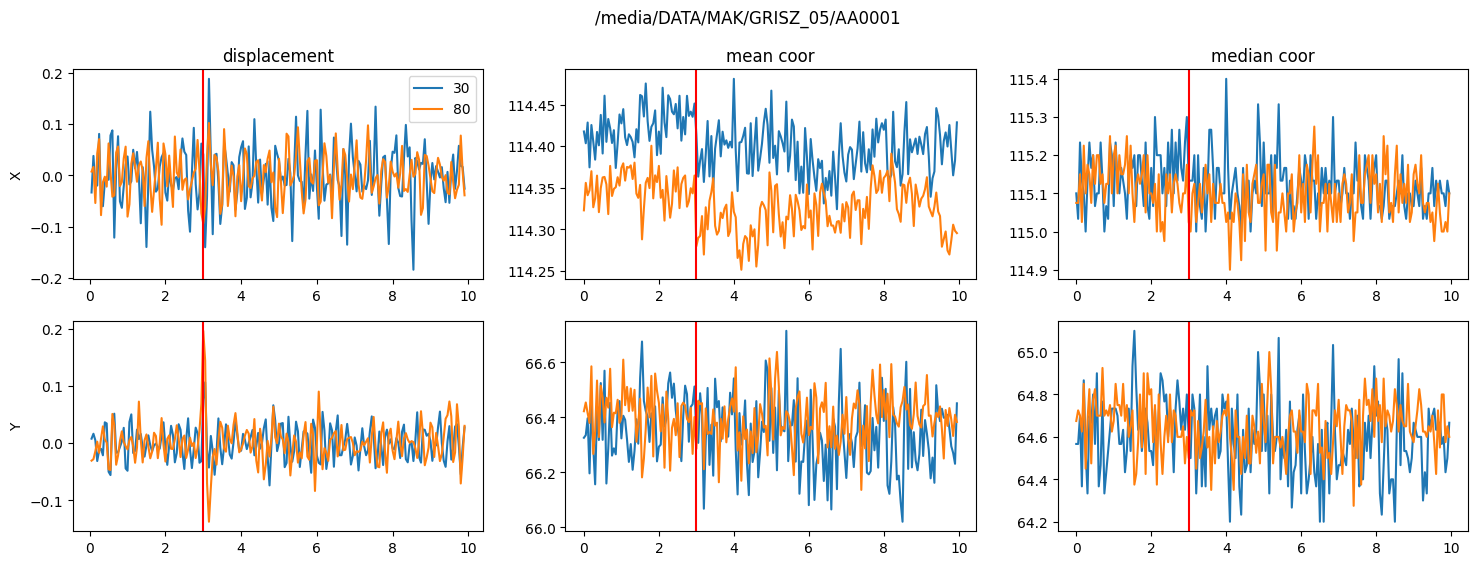

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from lib.signalProcess import butterFilter

# dir = '/media/DATA/MAK/GRISZ_02/AA0001'
# dir = '/media/DATA/MAK/GRISZ_05/AA0001'
# lowPassFilt = True
lowPassFilt = False

moveMeasures = ['Xdisp','Ydisp','meanX','meanY','medianX','medianY']
A = 30
B = 80

for a,b in df.groupby('dir'):
    fig,ax = plt.subplots(2,3,figsize=(18,6))
    t_disp = t[:-frameDiff]+0.05

    if lowPassFilt==False:
        dMove_A = {k:np.array(b[b['dB']==A][k].tolist()).mean(axis=0) for k in moveMeasures}
        dMove_B = {k:np.array(b[b['dB']==B][k].tolist()).mean(axis=0) for k in moveMeasures}
    else:
        dMove = {k:butterFilter(np.array(b[k].tolist()).mean(axis=0),cutoff_freq=3) for k in moveMeasures}

    ax[0,0].plot(t_disp,dMove_A['Xdisp'],label=A)
    ax[0,0].plot(t_disp,dMove_B['Xdisp'],label=B)
    ax[0,0].set_title('displacement')
    ax[0,0].set_ylabel('X')
    ax[0,0].legend()
    
    ax[1,0].plot(t_disp,dMove_A['Ydisp'],label=A)
    ax[1,0].plot(t_disp,dMove_B['Ydisp'],label=B)
    ax[0,1].set_title('mean coor')
    ax[1,0].set_ylabel('Y')

    ax[0,1].plot(t,dMove_A['meanX'],label=A)
    ax[0,1].plot(t,dMove_B['meanX'],label=B)
    ax[1,1].plot(t,dMove_A['meanY'],label=A)
    ax[1,1].plot(t,dMove_B['meanY'],label=B)

    ax[0,2].set_title('median coor')
    ax[0,2].plot(t,dMove_A['medianX'],label=A)
    ax[0,2].plot(t,dMove_B['medianX'],label=B)
    ax[1,2].plot(t,dMove_A['medianY'],label=A)
    ax[1,2].plot(t,dMove_B['medianY'],label=B)

    # Loop over rows and columns
    for i in range(2):
        for j in range(3):
            ax[i, j].axvline(x=3,color = 'r')

    fig.suptitle(a)



30.0
(14, 198)
40.0
(15, 198)
50.0
(17, 198)
60.0
(15, 198)
70.0
(15, 198)
80.0
(16, 198)


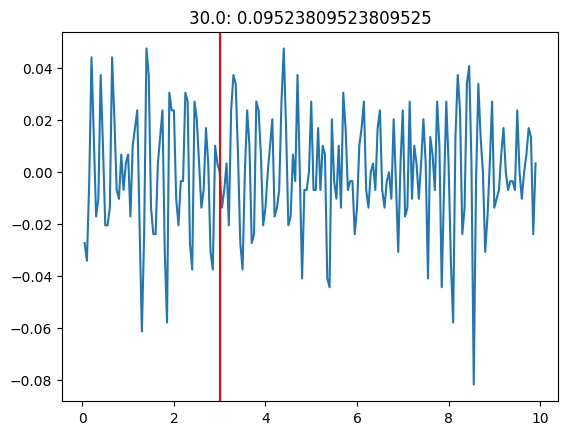

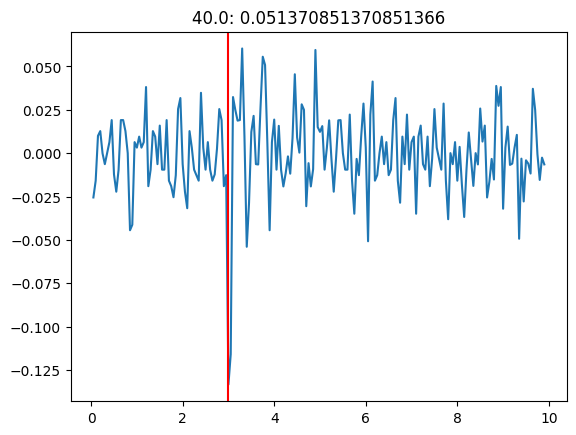

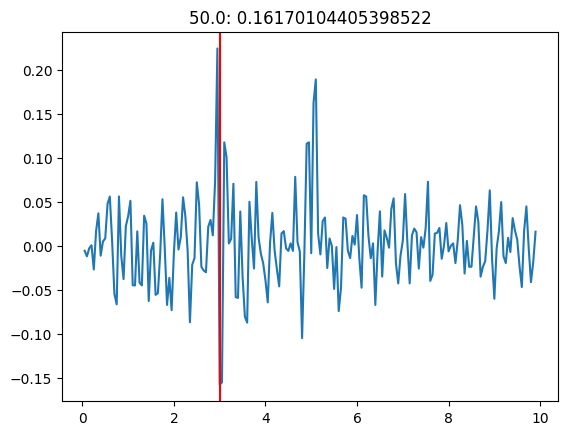

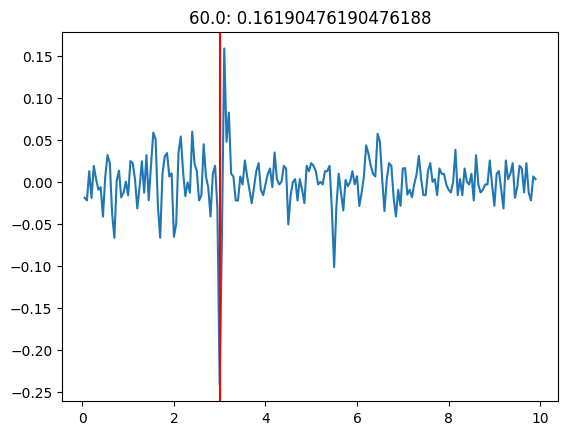

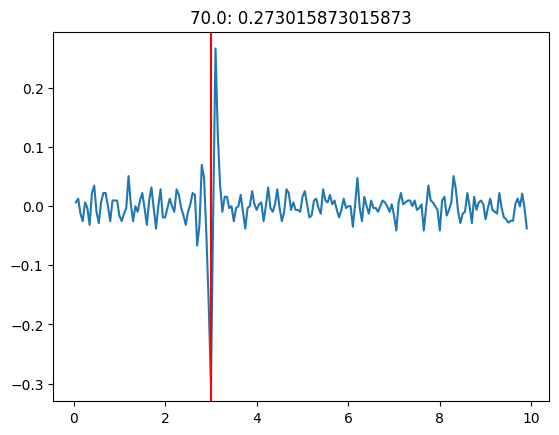

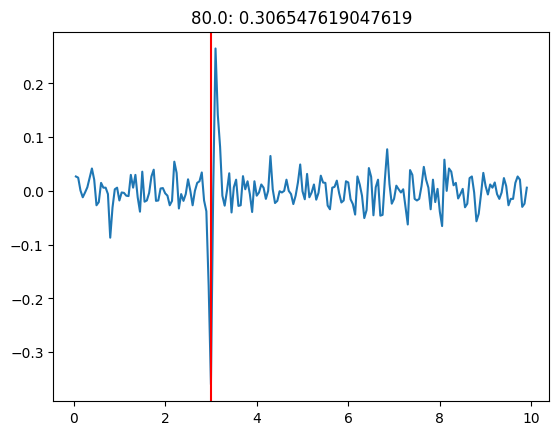

In [54]:
import lib.signalProcess as signalProcess
import importlib
importlib.reload(signalProcess)

for a,b in df[df['dir']==dir].groupby('dB')['Xdisp']:
    print(a)
    print(np.array(b.tolist()).shape)
    plt.figure()
    plt.plot(t_disp,np.array(b.tolist()).mean(axis=0))
    plt.axvline(x=3,color = 'r')
    resp = np.mean([signalProcess.getBaseResp(el,t_disp,t_base=(2,2.5))[1] for el in b.tolist()])
    plt.title(f'{a}: {resp}')


In [55]:
df['pkXdisp'] = df['Xdisp'].apply(lambda x: signalProcess.getBaseResp(x,t_disp,t_base=(2,2.5))[1])
df['pkYdisp'] = df['Ydisp'].apply(lambda x: signalProcess.getBaseResp(x,t_disp,t_base=(2,2.5))[1])

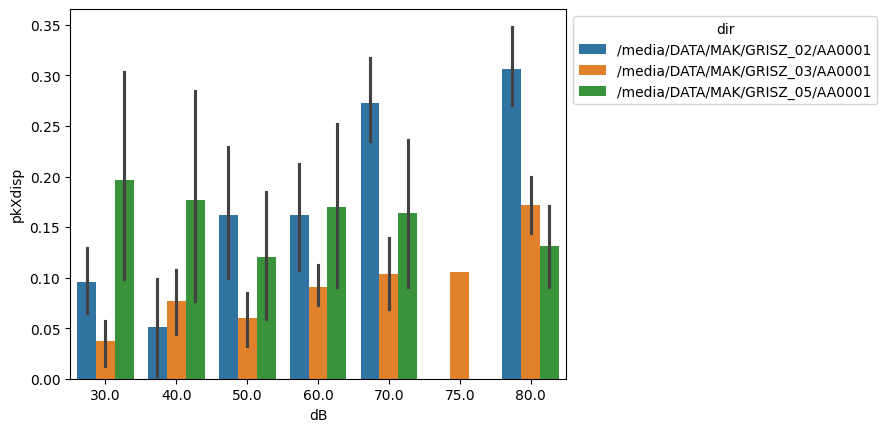

In [56]:
ax = sns.barplot(df, x="dB", y="pkXdisp", hue='dir')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

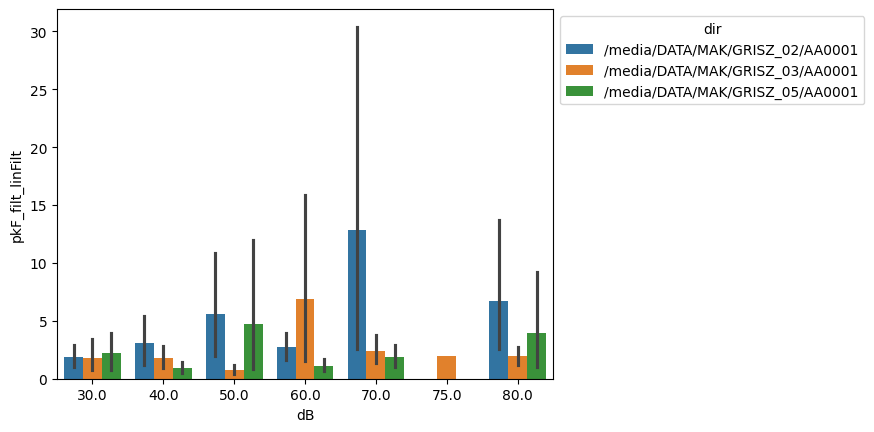

In [57]:
ax = sns.barplot(df, x="dB", y="pkF_filt_linFilt", hue='dir')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [58]:
# fig = px.histogram(df, x="dB", y="pkXdisp",
#              color='dir', barmode='group',
#              histfunc='avg',
#              height=400)
# fig.show()

In [59]:
# fig = px.histogram(df, x="dB", y="pkF_filt_linFilt",
#              color='dir', barmode='group',
#              histfunc='avg',
#              height=400)

# # fig = px.violin(dfXSG, y="pkF_filt_linFilt", x="dB", color="dir", box=False, points=False)
# fig.show()